# 鳶尾花分類ㄉ練習 105405132 廣告四 宋靜

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

In [12]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris["target"] = iris_dataset.target

iris.corr() #查看相關係數

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


大家一定都會選相關係數最高的，所以我來用用看相關係數第二、三高的features看看結果~~

In [20]:
x = np.array(iris.loc[:, ["sepal length (cm)", "petal width (cm)"]])
y = np.array(iris.target)

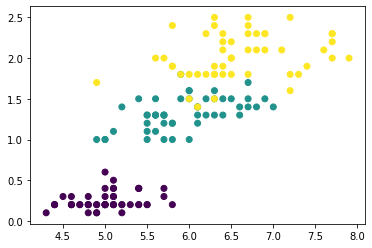

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 374)

## 開一台學習機：

In [26]:
clf = SVC(gamma="auto")

## 訓練：

In [30]:
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

array([0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 0, 1])

In [33]:
## 檢驗答對率：相減
y_predict-y_test

array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0])

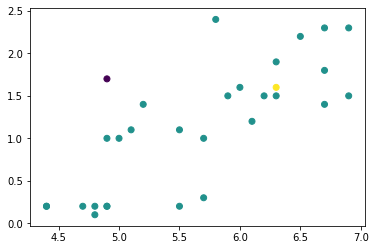

In [34]:
plt.scatter(x_test[:,0], x_test[:,1],c=y_predict - y_test)

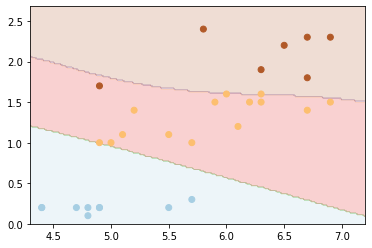

In [50]:
## 先做網格
y0 = np.arange(0.0, 2.7, 0.02)
x0 = np.arange(4.3, 7.2, 0.02)

xm, ym = np.meshgrid(x0, y0) ##結合
P = np.c_[xm.ravel(), ym.ravel()] ##拉平再結合
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha =0.2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap = "Paired")

# 測試結果還是蠻確的!